1. Розробити засоби для розрахунку з працівниками компанії на основі табелів про нарахування заробітної платні і квитанцій про використа- ння послуг, які надаються всередині компанії.
Працівники характеризуються ідентифікаційним номером, номером тарифного розряду та прізвищем. Дані про працівників задані окре- мим csv-файлом.
Запис у табелі містить ідентифікаційний номер працівника, дату і кількість відпрацьованих годин. Табелі містяться в кількох csv-файлах.
Запис у квитанції про обслуговування містить ідентифікаційний номер працівника, дату і ідентифікаційний номер послуги. Квитанції містя- ться в кількох csv-файлах.
Як табелі, так і квитанції є за кілька місяців, причому без прив'язки до конкретних місяців.
Тарифи характеризуються номером тарифного розряду і оплатою за годину праці.
Послуги характеризуються ідентифікаційним номером, назвою і вар- тістю за одноразову послугу.
2. Вивести:
(а) для кожного місяця, відображеного в табелях, загальну кількість відпрацьованого усіма працівниками часу;
(6) графіки до попереднього пункту;
(в) для кожного працівника суму нарахованої зарплати, суму оплати послуг і суму до виплати за період часу, заданий за допомогою віджету;
(г) графіки сум, зазначених у попередньому пункті;
(д) суми за кожен вид послуг за весь період часу, відображений у квитанціях;
(е) графіки до попереднього пункту.

In [1]:
import pandas as pd
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
employees = pd.read_csv('employees.csv')
tabel=pd.read_csv('Tabel.csv')
kvitancia=pd.read_csv('Kvitancia.csv')
posluga=pd.read_csv('Posluga.csv')
traffic=pd.read_csv('Traffic.csv')
display(employees)
display(tabel)
display(kvitancia)
display(posluga)
display(traffic)

,id,id_tariff,number,surname
0,1,1,10,Lukianchuk
1,2,2,11,Patrylo
2,3,3,12,Demko
3,5,4,14,Levus


,id,data_t,time
0,1,2024-02-03,3.0
1,2,2024-04-03,2.0
2,3,2024-01-09,1.5


,id,data_k,id_p
0,1,2024-01-08,2
1,2,2024-09-01,3
2,3,2024-10-02,1
3,4,2014-050-06,4


,id_p,service_name,cost
0,1,Чистка приміщень,200
1,2,Консультація юриста,500
2,3,Технічне обслуговування,300


,id_tariff,per_hour
0,1,50
1,2,60
2,3,70
3,4,80
4,5,100


In [3]:
merged = pd.merge(kvitancia, posluga, on='id_p', how='inner')
merged = pd.merge(merged, tabel, on='id', how='inner')
merged = pd.merge(merged, employees, on='id', how='inner')
merged = pd.merge(merged, traffic, on='id_tariff', how='inner')
merged

,id,data_k,id_p,service_name,cost,data_t,time,id_tariff,number,surname,per_hour
0,1,2024-01-08,2,Консультація юриста,500,2024-02-03,3.0,1,10,Lukianchuk,50
1,2,2024-09-01,3,Технічне обслуговування,300,2024-04-03,2.0,2,11,Patrylo,60
2,3,2024-10-02,1,Чистка приміщень,200,2024-01-09,1.5,3,12,Demko,70


In [4]:
merged['data_t'] = pd.to_datetime(merged['data_t'])

merged['mouth'] = merged['data_t'].dt.month
merged

,id,data_k,id_p,service_name,cost,data_t,time,id_tariff,number,surname,per_hour,mouth
0,1,2024-01-08,2,Консультація юриста,500,2024-02-03,3.0,1,10,Lukianchuk,50,2
1,2,2024-09-01,3,Технічне обслуговування,300,2024-04-03,2.0,2,11,Patrylo,60,4
2,3,2024-10-02,1,Чистка приміщень,200,2024-01-09,1.5,3,12,Demko,70,1


In [5]:
def summ_by_mouth():
    return merged.groupby(['surname','mouth'])['time'].sum().reset_index()

display(summ_by_mouth())

,surname,mouth,time
0,Demko,1,1.5
1,Lukianchuk,2,3.0
2,Patrylo,4,2.0


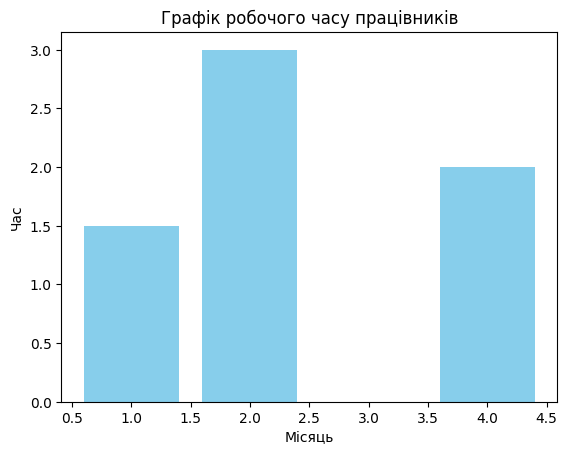

In [6]:
plt.bar(summ_by_mouth()['mouth'], summ_by_mouth()['time'], color='skyblue')
plt.xlabel('Місяць')
plt.ylabel('Час')
plt.title('Графік робочого часу працівників')
plt.show()

In [7]:
merged['total']=merged['per_hour']*merged['time']
merged

,id,data_k,id_p,service_name,cost,data_t,time,id_tariff,number,surname,per_hour,mouth,total
0,1,2024-01-08,2,Консультація юриста,500,2024-02-03,3.0,1,10,Lukianchuk,50,2,150.0
1,2,2024-09-01,3,Технічне обслуговування,300,2024-04-03,2.0,2,11,Patrylo,60,4,120.0
2,3,2024-10-02,1,Чистка приміщень,200,2024-01-09,1.5,3,12,Demko,70,1,105.0


In [8]:
def total_hours_visitor(surname, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filt = (merged['data_t'] >= start_date) & (merged['data_t'] <= end_date)
    filtered_df = merged.loc[filt]

    filtered_df = filtered_df.groupby(['surname', 'service_name'])['total'].sum().reset_index()
    group_df = filtered_df.groupby('surname')

    if surname not in filtered_df['surname'].values:
        print('None')
    else:
        total_hours_for_visitor = group_df.get_group(surname)
        display(total_hours_for_visitor)
    

In [9]:
start = widgets.DatePicker(
    descriprion = 'start date',
    value = merged['data_t'].min(),
)

end = widgets.DatePicker(
    descriprion = 'end date',
    value = merged['data_t'].max(),
)

name_widget = widgets.Dropdown(
    description = 'name',
    options = merged['surname'].unique(),
    value = merged['surname'].loc[0]
)

In [10]:
widget = widgets.interactive(total_hours_visitor, surname = name_widget, start_date = start, end_date = end)
display(widget)

interactive(children=(Dropdown(description='name', options=('Lukianchuk', 'Patrylo', 'Demko'), value='Lukianch…

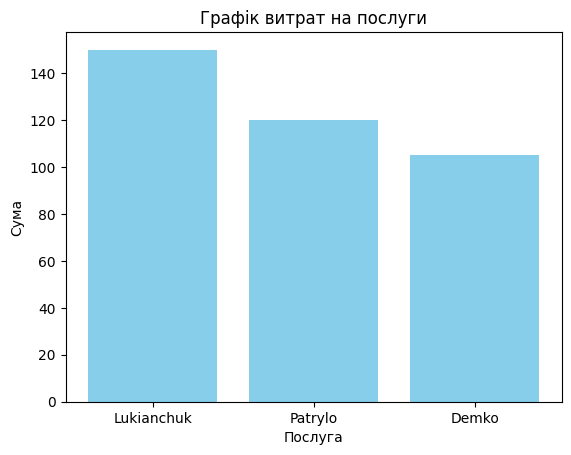

In [11]:
plt.bar(merged['surname'], merged['total'], color='skyblue')
plt.xlabel('Послуга')
plt.ylabel('Сума')
plt.title('Графік витрат на послуги')
plt.show()

In [12]:
result = merged.groupby('service_name')['cost'].sum().reset_index()
result

,service_name,cost
0,Консультація юриста,500
1,Технічне обслуговування,300
2,Чистка приміщень,200


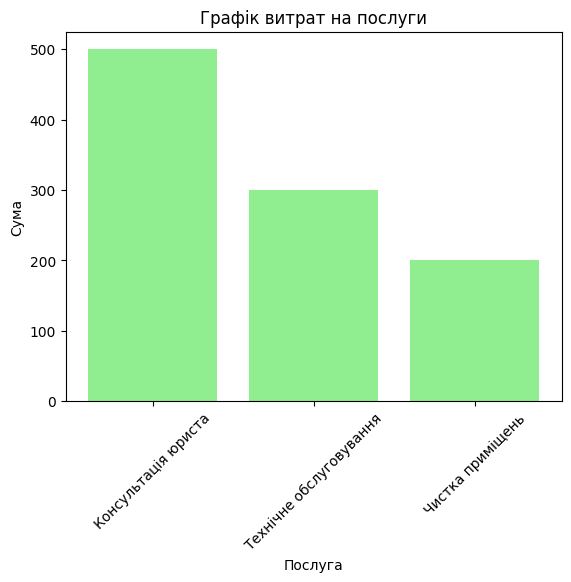

In [13]:
plt.bar(result['service_name'], result['cost'], color='lightgreen')
plt.xlabel('Послуга')
plt.ylabel('Сума')
plt.xticks(rotation=45)
plt.title('Графік витрат на послуги')
plt.show()